In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [3]:
# from imblearn import over_sampling

1) Ucitati podatke iz datoteke *creditcard.csv* u kojoj se nalaze podaci o bankarskim transakcijama i njihova klasifikacija na regularne i neregularne transakcije.  

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

2) Ispisati broj instanci koje pripadaju ovim klasama. 

In [7]:
report = data[['Time', 'Class']].groupby('Class').count()
report = report.rename(index=str, columns={'Time': 'Number of'})
report

,Number of
Class,
0,284315
1,492


In [1]:
data['Class'].value_counts()

NameError: name 'data' is not defined

In [9]:
n = data['Class'].count()
n_regular = data['Class'].value_counts()[0]
n_fraud = data['Class'].value_counts()[1]

In [10]:
print('Total: ', n)
print('Regular: ', n_regular)
print('Fraud: ', n_fraud)
print('Ratio of regular ones: ', round(n_regular / n, 5))
print('Ratio of fraud ones: ', round(n_fraud / n, 5))

Total:  284807
Regular:  284315
Fraud:  492
Ratio of regular ones:  0.99827
Ratio of fraud ones:  0.00173


Text(0,0.5,'Number of instances')

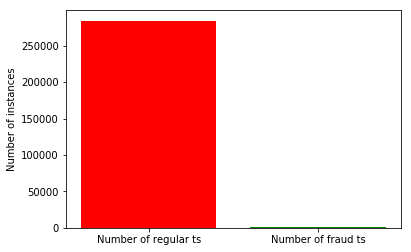

In [11]:
plt.bar([0, 1], [n_regular, n_fraud], color=['red', 'green'])
plt.xticks([0, 1], ['Number of regular ts', 'Number of fraud ts'])
plt.ylabel('Number of instances')

3) Pripremiti skupove podataka za ucenje. 

In [12]:
data = data.drop(['Time'], axis=1)
X = np.array(data.drop(['Class'], axis=1))
y = np.array(data[['Class']])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
1,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
2,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
3,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
4,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95


Vrsimo normalizaciju atributa Value, odnosno vrednosti transakcije. Vazno je da smo prvo
izvrsili podelu podataka na skup za obucavanja i testiranje kako informacije iz skupa za obucavanje
ne bi uplivale u skup za testiranje.

In [15]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[:, -1].reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train[:, -1] = scaler.transform(X_train[:, -1].reshape(-1, 1)).reshape(-1,)
X_test[:, -1] = scaler.transform(X_test[:, -1].reshape(-1, 1)).reshape(-1,)

4) Primeniti algoritam logisticke regresije i prikazati klasifikacioni izvestaj. Sta nije u redu? Koju meru ima smisla koristiti?

In [35]:
def perform_classification(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    print('Train confusion matrix:\n', metrics.confusion_matrix(y_train, y_train_pred), '\n')
    print('Test confusion matrix:\n', metrics.confusion_matrix(y_test, y_test_pred), '\n')
    
    print('Train classification report:\n', metrics.classification_report(y_train, y_train_pred), '\n')
    print('Test classification report:\n', metrics.classification_report(y_test, y_test_pred), '\n')
    
    return clf

In [18]:
perform_classification(linear_model.LogisticRegression(), X_train, y_train, X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train confusion matrix:
 [[198990     29]
 [   131    214]] 

Test confusion matrix:
 [[85284    12]
 [   56    91]] 

Train classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.88      0.62      0.73       345

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.94      0.81      0.86    199364
weighted avg       1.00      1.00      1.00    199364
 

Test classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443
 



5) Pridruziti tezine klasama proporcionalne velicini.

Klasifikatori imaju argument `class_weight` koji ako je jednak `balanced` pridruzuje tezine klasama po formuli:
$$
w_j = \frac{n}{k n_j}
$$

gde su:
- $n$ - broj instanci
- $n_j$: broj instanci klase j
- $k$: broj klasa

In [19]:
clf = linear_model.LogisticRegression(random_state=0, class_weight='balanced')
perform_classification(clf, X_train, y_train, X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train confusion matrix:
 [[194304   4715]
 [    29    316]] 

Test confusion matrix:
 [[83359  1937]
 [   13   134]] 

Train classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199019
           1       0.06      0.92      0.12       345

   micro avg       0.98      0.98      0.98    199364
   macro avg       0.53      0.95      0.55    199364
weighted avg       1.00      0.98      0.99    199364
 

Test classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.91      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443
 



6) Nauciti optimalne vrednosti parametara tezina iz skupa $weights=np.linspace(0.05, 0.95, 20)$

In [20]:
weights = np.linspace(0.05, 0.95, 20)

gsc = model_selection.GridSearchCV(
    estimator=linear_model.LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    verbose=10,
    n_jobs=3,
    cv=3,
)
grid_result = gsc.fit(X, y)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   11.6s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   31.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   47.2s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  4.8min finished
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Best parameters : {'class_weight': {0: 0.14473684210526316, 1: 0.8552631578947368}}


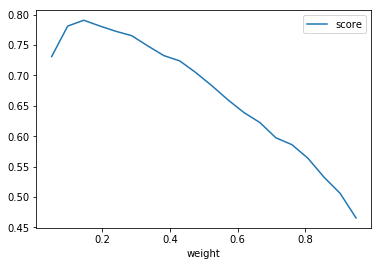

In [21]:
print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [ ]:
tmp = {'C': 6}

In [25]:
clf = linear_model.LogisticRegression(**gsc.best_params_)
perform_classification(clf, X_train, y_train, X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train confusion matrix:
 [[198946     73]
 [    65    280]] 

Test confusion matrix:
 [[85274    22]
 [   29   118]] 

Train classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.79      0.81      0.80       345

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.90      0.91      0.90    199364
weighted avg       1.00      1.00      1.00    199364
 

Test classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.80      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443
 



7) U nekim slucajevima je podesno koristiti metode sintetickog generisanja podataka. Jedan od najpoznatijih algoritama za generisanje instanci manjinske klase je SMOTE algoritam. Za svaku instancu manjinske klase se bira $k$ najblizih suseda (npr. k=5), a zatim se u zavisnosti od faktora uvecanja $scale$ (npr. scale = 200%) biraju svi susedi ili slucajno, samo neki od njih. Duz pravca koji vodi od instance manjinske klase ka susedu, generise se nova instanca (minority_instance + alpha*difference).   

In [33]:
from imblearn.over_sampling import SMOTE
# from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline

In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [36]:
clf = perform_classification(linear_model.LogisticRegression(), X_train_res, y_train_res, X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train confusion matrix:
 [[193969   5050]
 [ 16784 182235]] 

Test confusion matrix:
 [[83193  2103]
 [   12   135]] 

Train classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    199019
           1       0.97      0.92      0.94    199019

   micro avg       0.95      0.95      0.95    398038
   macro avg       0.95      0.95      0.95    398038
weighted avg       0.95      0.95      0.95    398038
 

Test classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443
 



In [34]:
pipe = make_pipeline(
    SMOTE(),
    linear_model.LogisticRegression()
)

perform_classification(pipe, X_train, y_train, X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train confusion matrix:
 [[193976   5043]
 [    27    318]] 

Test confusion matrix:
 [[83202  2094]
 [   12   135]] 

Train classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    199019
           1       0.06      0.92      0.11       345

   micro avg       0.97      0.97      0.97    199364
   macro avg       0.53      0.95      0.55    199364
weighted avg       1.00      0.97      0.99    199364
 

Test classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443
 



Takodje, koristeci SMOTE mozemo da primenimo GridSearch

In [37]:
pipe = make_pipeline(
    SMOTE(),
    linear_model.LogisticRegression()
)

weights = np.linspace(0.005, 0.05, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        #'smote__ratio': [{0: int(num_neg), 1: int(num_neg * w) } for w in weights]
        'smote__ratio': weights
    },
    scoring='f1',
    verbose=10,
    n_jobs=3,
    cv=3
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

NameError: name 'LogisticRegression' is not defined